** Introduction ** 

In this assignment, you will use various Python libraries to create data visualization. You will work with pandas to import, merge, clean, and analyze the data, 
then use Matplotlib for data visualization. In class, you worked on a dataset of immigrants to Canada published by the UN. In this lab, you will be working on
 two datasets from the USA and Canada

** Questions **

1. Look up the 5 countries with the largest number of immigrants to Canada. (Sum the total number of emigrants from 1980 to 2013 
coming from each country. Then sort from largest to smallest. )
2. Add a “total” row for each year.
3. Plot all 5 countries with largest emmigrants and total across different years (There will be 6 Lines, 5 for the countries and 1 for the total.)
4. In which year the maximum number of people have immigrated from these 5 countries to Canada? (Total line will show the answer)  
Add annotation to the maximum point and name it “Maximum”.
5. Repeat the above steps for USA data (This time use USA data instead of Canada)

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df_can = pd.read_excel(
    './Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data for Canada read into a pandas dataframe!')

df_usa = pd.read_excel(
    './USA.xlsx',
    sheet_name='USA by Place of birth',
    skiprows=range(20),
    skipfooter=2)
print('Data for USA read into a pandas dataframe!')

Data for Canada read into a pandas dataframe!
Data for USA read into a pandas dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [27]:
##Clean Data
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'AreaName', 'RegName','DevName'], axis=1, inplace=True)

In [28]:
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [29]:
df_can.rename(columns={'OdName':'Country'},inplace=True)
df_can.set_index("Country",inplace=True)
df_can.head(10)

KeyError: "None of ['Country'] are in the columns"

In [30]:
##setting a new column called 'total' / suming up the total sum
df_can['Total']=df_can.sum(axis=1) 
df_can.sort_values('Total', ascending=False, inplace=True) #axis = 1, columns and 0, rows
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


In [31]:
can_top5 = df_can.iloc[:5,:-1]
can_top5.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [32]:
can_top5.loc['Total']=can_top5.sum(numeric_only = True, axis=0)
can_top5.head(6)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Total,43077,47041,38525,24678,21870,19255,23437,42601,51612,52587,...,99790,118505,106033,94561,101158,103744,118778,106448,115694,115190


In [36]:
#Visualization 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [33]:

print(can_top5.loc['Total'].idxmax(), can_top5.loc['Total'].max())

2010 118778


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,909,875,1033,1018,1018,933,851,982,1121,23829


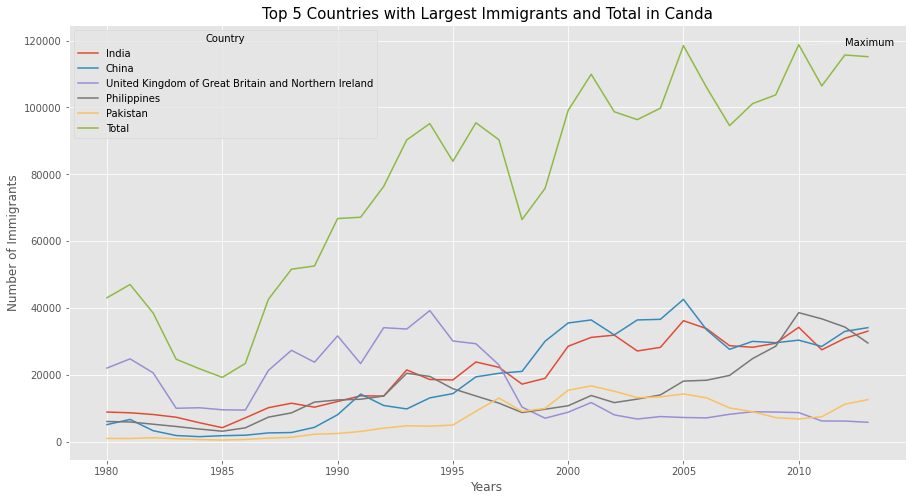

In [38]:
can_top5.transpose().plot(figsize=(15,8))
plt.title('Top 5 Countries with Largest Immigrants and Total in Canda',
            fontsize = 15)
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.annotate('Maximum', xy=(2010,118778), xycoords='data',xytext=(2012,118500), arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()

In [39]:
df_usa.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)
df_usa.rename(columns={'OdName':'Country'},inplace=True)

In [40]:
df_usa.set_index("Country",inplace=True)
df_usa.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,722,1881,1569,2566,3222,2794,2831,2424,2873,3232,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,30,11,23,22,32,45,53,62,82,71,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,175,184,190,201,197,202,183,172,199,230,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,0,0,7,7,0,0,0,1,0,..,...,12,15,28,11,14,19,14,D,-,D
Andorra,2,3,2,1,0,0,1,0,0,4,...,..,..,..,..,..,..,..,..,..,..


In [41]:
years = list(range(1980,2013))

In [42]:
df_usa[years]=df_usa[years].apply(pd.to_numeric,errors='coerce')

In [43]:
df_usa['Total']=df_usa[years].sum(axis=1)
df_usa.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,2424.0,2873.0,3232.0,...,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648.0,1617.0,2196,72234.0
Albania,30.0,11.0,23.0,22.0,32.0,45.0,53.0,62.0,82.0,71.0,...,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612.0,3364.0,3186,84194.0
Algeria,175.0,184.0,190.0,201.0,197.0,202.0,183.0,172.0,199.0,230.0,...,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364.0,1369.0,1241,22040.0
American Samoa,0.0,0.0,7.0,7.0,0.0,0.0,0.0,1.0,0.0,NaN,...,15.0,28.0,11.0,14.0,19.0,14.0,NaN,NaN,D,220.0
Andorra,2.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,18.0


In [44]:
df_usa.sort_values('Total', ascending=False, inplace=True)
df_usa.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,56680.0,101268.0,56106.0,59079.0,57557.0,61077.0,66533.0,72351.0,95039.0,405172.0,...,161445.0,173749.0,148640.0,189989.0,164920.0,139120.0,143446.0,146406.0,135028,5943520.0
Philippines,42316.0,43772.0,45102.0,41546.0,42768.0,47978.0,52558.0,50060.0,50697.0,57034.0,...,60746.0,74606.0,72596.0,54030.0,60029.0,58173.0,57011.0,57327.0,54446,1744426.0
China,27651.0,25803.0,27100.0,25777.0,23363.0,24787.0,25106.0,25841.0,28717.0,32272.0,...,69933.0,87307.0,76655.0,80271.0,64238.0,70863.0,87016.0,81784.0,71798,1554114.0
India,22607.0,21522.0,21738.0,25451.0,24964.0,26026.0,26227.0,27803.0,26268.0,31175.0,...,84680.0,61369.0,65353.0,63352.0,57304.0,69162.0,69013.0,66434.0,68458,1465318.0
Viet Nam,43483.0,55631.0,72553.0,37560.0,37236.0,31895.0,29993.0,24231.0,25789.0,37739.0,...,32784.0,30691.0,28691.0,31497.0,29234.0,30632.0,34157.0,28304.0,27101,1234325.0


In [45]:
usa_top5 = df_usa.iloc[:5,:-1]

In [46]:
usa_top5.loc['Total']=usa_top5.sum(numeric_only = True, axis=0)
usa_top5.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,56680.0,101268.0,56106.0,59079.0,57557.0,61077.0,66533.0,72351.0,95039.0,405172.0,...,175411.0,161445.0,173749.0,148640.0,189989.0,164920.0,139120.0,143446.0,146406.0,135028
Philippines,42316.0,43772.0,45102.0,41546.0,42768.0,47978.0,52558.0,50060.0,50697.0,57034.0,...,57846.0,60746.0,74606.0,72596.0,54030.0,60029.0,58173.0,57011.0,57327.0,54446
China,27651.0,25803.0,27100.0,25777.0,23363.0,24787.0,25106.0,25841.0,28717.0,32272.0,...,55494.0,69933.0,87307.0,76655.0,80271.0,64238.0,70863.0,87016.0,81784.0,71798
India,22607.0,21522.0,21738.0,25451.0,24964.0,26026.0,26227.0,27803.0,26268.0,31175.0,...,70151.0,84680.0,61369.0,65353.0,63352.0,57304.0,69162.0,69013.0,66434.0,68458
Viet Nam,43483.0,55631.0,72553.0,37560.0,37236.0,31895.0,29993.0,24231.0,25789.0,37739.0,...,31524.0,32784.0,30691.0,28691.0,31497.0,29234.0,30632.0,34157.0,28304.0,27101


In [47]:
print(usa_top5.loc['Total'].astype('float64').idxmax(), usa_top5.loc['Total'].max())

1991 1143159.0


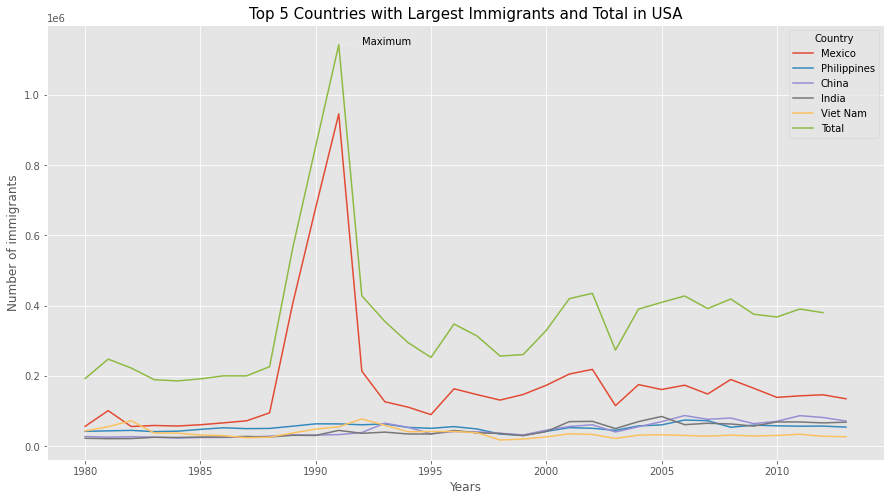

In [50]:
usa_top5.transpose().plot(figsize=(15,8))
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.title('Top 5 Countries with Largest Immigrants and Total in USA',
          fontsize = 15)
plt.annotate('Maximum', xy=(1991,1143159), xycoords='data',xytext=(1992,1143159), arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()